# $$DETECTION-OF-PHISHING-WEBSITES$$
## Algorithm Implemented - MULTILAYER PERCEPTRON
### Off The Shelf Implementation

## Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score

## Read and Load Data
The dataset shown below caters to the attributes of multiple websites. We have a total of 11055 webistes, each having data of 30 attributes (features)

In [ ]:
# Reading the data
data = pd.read_csv("/content/drive/MyDrive/Data Mining Project/dataset.csv")
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


## VISUALIZING THE DATASET

Obtaining the shape of the dataset.

In [ ]:
data.shape

(11055, 31)

In [ ]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking DataSet for Null/NaN Values

An inspection of null values within the dataset has been made. If there are any null values present, they are being dropped and the shape of dataset post dropping the null values is being obtained.

In [ ]:
data=data.dropna()
data.shape

(11055, 31)

In [ ]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### Class Distribution and Imbalance Analysis
A check for the class imbalance has been made. An analysis on the presence of both classes has been done.

counts
 1    6157
-1    4898
Name: Result, dtype: int64

ratio of classes
1.2570436913025724



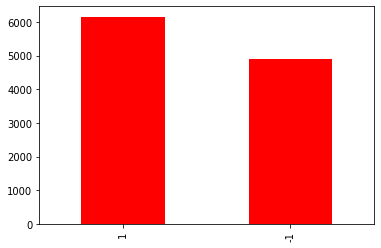

In [ ]:
print ('counts')
print (pd.value_counts(data['Result']))
print ()
print ('ratio of classes')
print (pd.value_counts(data['Result'])[1]/pd.value_counts(data['Result'])[-1])
print ()
pd.value_counts(data['Result']).plot.bar(color = 'red')

### Checking for counts of Different values of each Feature


In [ ]:
counts_data_frame = pd.DataFrame()
counts_data_frame['count_of'] = [-1,0,1]
cols = list(data.columns)
for col in cols:
    cnt = data[col].value_counts()
    l = np.zeros(3)
    for val in cnt.index.values:
        l[val+1] = cnt[val]
    counts_data_frame[col] = l

counts_data_frame.set_index('count_of', inplace=True)
counts_data_frame

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count_of,,,,,,,,,,,,,,,,,,,,,
-1,3793.0,8960.0,1444.0,1655.0,1429.0,9590.0,3363.0,3557.0,7389.0,2053.0,...,2137.0,1012.0,5189.0,3443.0,2655.0,8201.0,1539.0,548.0,1550.0,4898.0
0,0.0,135.0,0.0,0.0,0.0,0.0,3622.0,1167.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2569.0,0.0,0.0,6156.0,0.0,0.0
1,7262.0,1960.0,9611.0,9400.0,9626.0,1465.0,4070.0,6331.0,3666.0,9002.0,...,8918.0,10043.0,5866.0,7612.0,5831.0,2854.0,9516.0,4351.0,9505.0,6157.0


### Plots for different values in each Feature

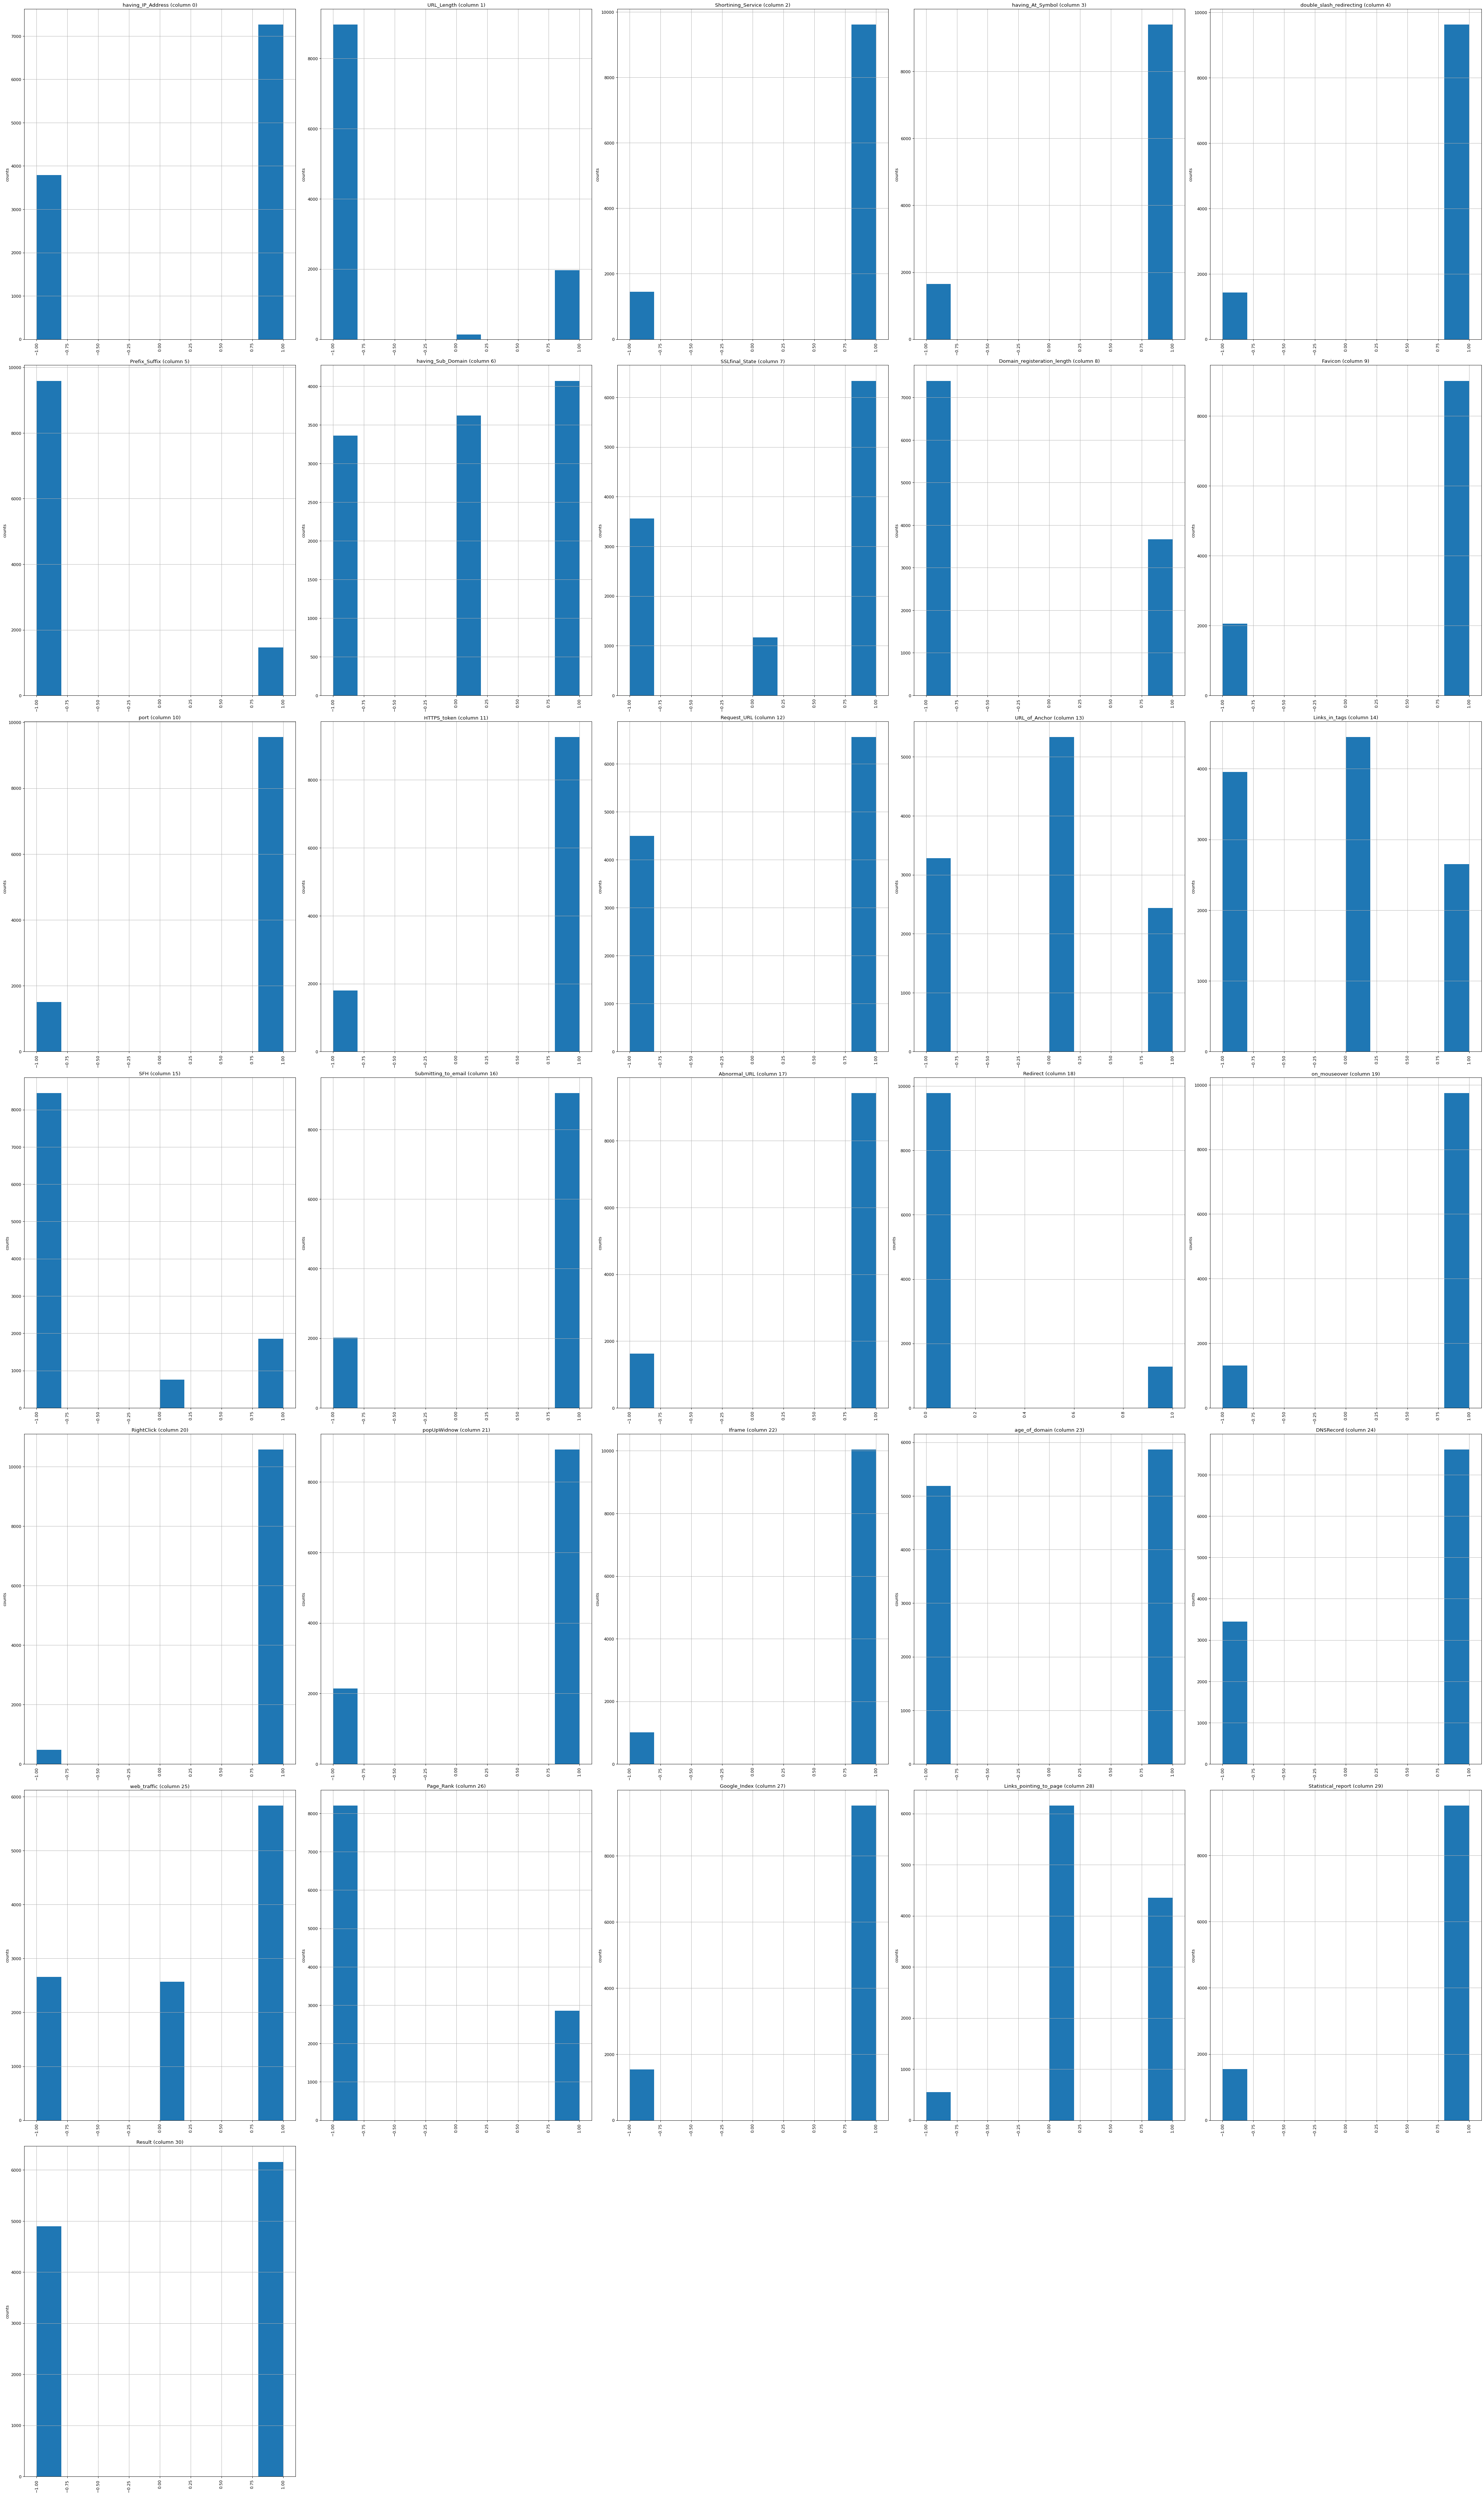

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (10 * nGraphPerRow, 12 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(data, 50, 5)

### Distribution of Classes per Feature

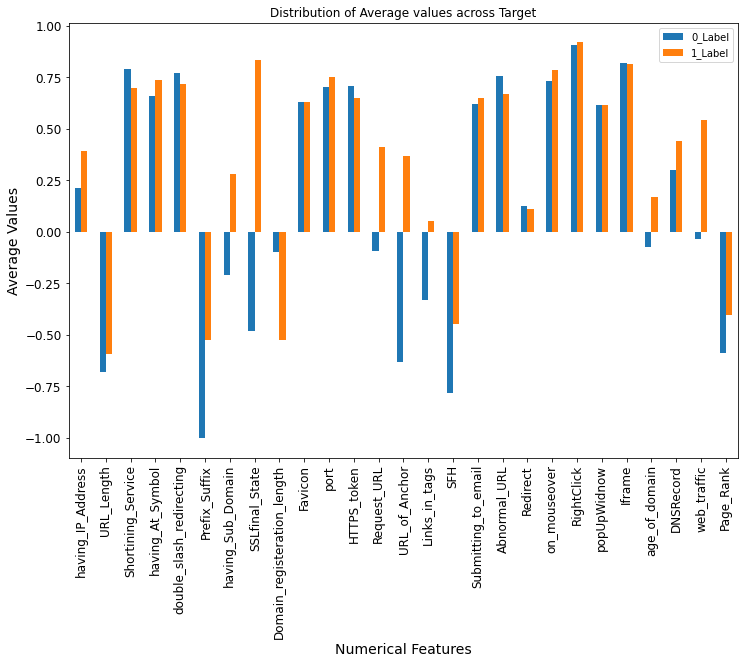

In [ ]:
cols = data.columns[:-1]
df_distr =data.groupby('Result')[cols].mean().reset_index().T
df_distr.rename(columns={0:'0_Label',1:"1_Label"}, inplace=True)

#plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
ax = df_distr[1:-3][['0_Label','1_Label']].plot(kind='bar', title ="Distribution of Average values across Target", figsize=(12, 8), legend=True, fontsize=12)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
#ax.set_ylim(0,500000)
plt.show()

### PLOTTING THE CORRELATION MATRIX

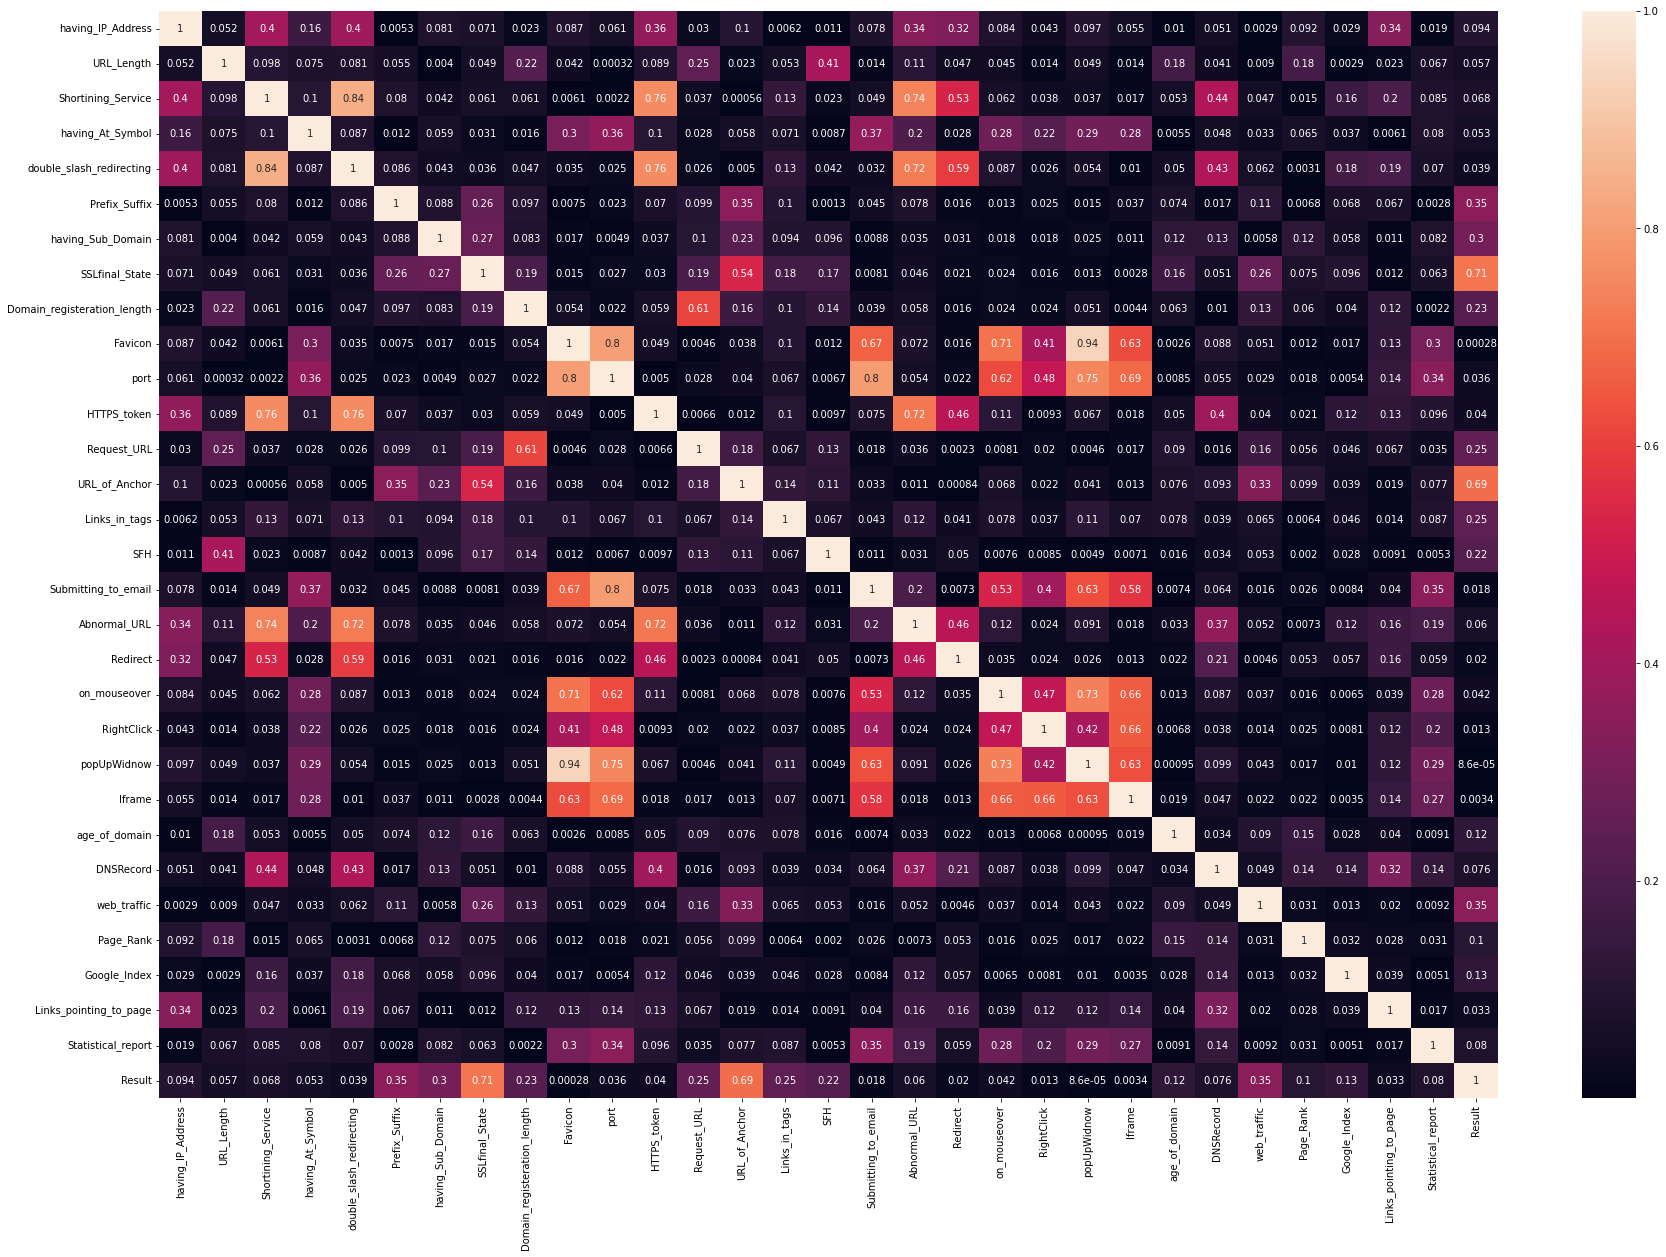

In [ ]:
plt.figure(figsize = [30,20])
sns.heatmap(data.corr().abs(), annot = True)

## Splitting the DataSet into TEST AND TRAIN
Before splitting the dataset into training and testing. Values -1 are replaced by 0 in the labels column, in order to ensure a simplified computation and execution of the model.

In [ ]:
x = np.array(data.drop(columns = ['Result']))
y = np.array(data['Result'])

print("The parameters dataset is of size: ",x.shape)
print("The Target Variable data is of size: ",y.shape)

print()

print(np.unique(y, return_counts = True))

y[y==-1] = 0

print()

print(np.unique(y, return_counts = True))

The parameters dataset is of size:  (11055, 30)
The Target Variable data is of size:  (11055,)

(array([-1,  1]), array([4898, 6157]))

(array([0, 1]), array([4898, 6157]))


The data is now split in the ration of 70% to 30% (training data size = 70% and test data size = 30%)

In [ ]:
sf = 0.7
n_train = math.floor(sf * x.shape[0])
n_test = math.ceil((1-sf) * x.shape[0])
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

# reshaping the x_train and x_test
x_train2 = x_train.T
x_test2 = x_test.T

print("x_train2.shape = ",x_train.shape)
print("y_train.shape = ",y_train.shape)
print("x_test2.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

x_train2.shape =  (7738, 30)
y_train.shape =  (7738,)
x_test2.shape =  (3317, 30)
y_test.shape =  (3317,)


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 32)

# x_train2 = x_train.T
# x_test2 = x_test.T

# print("The parameters TRAINING dataset is of size: ",x_train.shape)
# print("The parameters TRAINING dataset is of size: ",y_train.shape)
# print("The Target Variable TESTING data is of size: ",x_test.shape)
# print("The Target Variable TESTING data is of size: ",y_test.shape)

## SKlearn MLP Classifier
The off the shelf sklearn implementation of MULTILAYER Perceptron has been initialized with the following parameters:
1.   Maximum number of Iterations = 500
2.   Batch Size = 100
3.   No of Hidden Layers = [12,8]
4.   Activation Function = 'Sigmoid' / 'Logistic'
5.   Learning Rate (Alpha) = 0.001



In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(max_iter=500, batch_size = 100, hidden_layer_sizes=(12,8), activation = 'logistic', alpha = 0.001)
classifier.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size=100,
              hidden_layer_sizes=(12, 8), max_iter=500)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred.shape

(3317,)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("The obtained accuracy =", accuracy*100, "%")

The obtained accuracy = 90.20198974977389 %


In [ ]:
classifier.get_params()

{'activation': 'logistic',
 'alpha': 0.001,
 'batch_size': 100,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (12, 8),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

The Confusion matrix will be plotted for the previous model's execution in order to deeply assess the performance of the model. Namely, Recall will be computed, as we are more concerned about those websites that the model predicted as safe but in reality were phishing.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusionmat = confusion_matrix(y_test, y_pred)

print(confusionmat)

[[1234  230]
 [  95 1758]]


In [ ]:
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1464
           1       0.88      0.95      0.92      1853

    accuracy                           0.90      3317
   macro avg       0.91      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



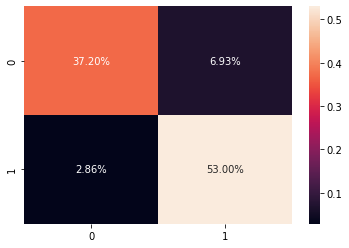

In [ ]:
sns.heatmap(confusionmat/np.sum(confusionmat), fmt = '.2%', annot = True)

In [ ]:
precision = confusionmat[0,0]/(confusionmat[0,0] + confusionmat[1,0])
recall = confusionmat[0,0]/(confusionmat[0,0] + confusionmat[0,1])
misrate = confusionmat[1,0] / (confusionmat[1,0] + confusionmat[0,0])

print("Precision = ", round(precision,2))
print("Recall = ", round(recall,2))
print("Miss Rate = ", round(misrate,2))

Precision =  0.93
Recall =  0.84
Miss Rate =  0.07


In [ ]:
f1_score = (2*precision * recall) / (precision + recall)
print("F1 Score = ", round(f1_score,2))

F1 Score =  0.88


In [ ]:
print(classifier.coefs_[0].shape)
print(classifier.coefs_[1].shape)
# print(classifier.coefs_[2].shape)
# print(classifier.coefs_[3].shape)

(30, 12)
(12, 8)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("The obtained accuracy =", accuracy*100, "%")

The obtained accuracy = 90.20198974977389 %


## HyperParameter Tuning
For a more nuanced analysis of the model, the model is initially trained for different values of batch size and epochs. Accuracies corresponding to every iteration is stored and plotted. Finally the best set of Hyperparameters is then chosen to train the model finally.

In [ ]:
# from sklearn.neural_network import MLPClassifier
# classifier = MLPClassifier(solver = 'lbfgs', max_iter = 2000,
#                            alpha = 1e-5, hidden_layer_sizes = (4,2),
#                            random_state = 1)
# classifier.fit(x_train, y_train)

In [ ]:
# y_pred = classifier.predict(x_test)
# y_pred.shape

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
# print("The obtained accuracy =", accuracy*100, "%")

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

In [ ]:
classifier2 = Sequential()

classifier2.add(Dense(units = 12, input_dim = 30, kernel_initializer = 'uniform',
                      activation = 'relu'))

classifier2.add(Dense(units = 8, kernel_initializer = 'uniform',
                      activation = 'relu'))

classifier2.add(Dense(units = 1, kernel_initializer = 'uniform',
                      activation = 'sigmoid'))

classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

ann_model = classifier2.fit(x_train, y_train, batch_size = 100, epochs=10,
                            verbose = 1)

Epoch 1/10
78/78 [==============================] - 3s 3ms/step - loss: 0.6754 - accuracy: 0.6679
Epoch 2/10
78/78 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8907
Epoch 3/10
78/78 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.9160
Epoch 4/10
78/78 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9227
Epoch 5/10
78/78 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.9256
Epoch 6/10
78/78 [==============================] - 0s 3ms/step - loss: 0.1910 - accuracy: 0.9262
Epoch 7/10
78/78 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9288
Epoch 8/10
78/78 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.9281
Epoch 9/10
78/78 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9278
Epoch 10/10
78/78 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.9278


In [ ]:
def findBestParams(x_train, y_train):

  trialNumber = 0
  batch_size = [50,100,150,200,250]
  epochs = [50,100,125,200]
  activation_funcs = []


  df = pd.DataFrame(columns = ['Trial Number', 'Parameter', 'Accuracy'])

  for trial_batch_size in batch_size:
    for epoch in epochs:
      trialNumber = trialNumber + 1

      classifier = Sequential()
      classifier.add(Dense(units = 12, input_dim = 30, kernel_initializer = 'uniform',
                      activation = 'relu'))
      classifier.add(Dense(units = 8, kernel_initializer = 'uniform',
                      activation = 'relu'))
      classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                      activation = 'sigmoid'))
      classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                         metrics = ['accuracy'])

      ann_model = classifier.fit(x_train,y_train, batch_size = trial_batch_size, epochs = epoch, verbose = 0)
      accuracy = ann_model.history['accuracy'][-1]

      print("No.",trialNumber, "We get following parameters: ", "Batch Size = ", trial_batch_size, " and Accuracy = ", accuracy)

      df = df.append(pd.DataFrame(data=[[trialNumber, 'batch_size'+str(trial_batch_size)+'-'+'epoch'+str(epoch), accuracy]], columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
  return(df)
resulting_data = findBestParams(x_train, y_train)

No. 1 We get following parameters:  Batch Size =  50  and Accuracy =  0.9365469217300415
No. 2 We get following parameters:  Batch Size =  50  and Accuracy =  0.9399069547653198
No. 3 We get following parameters:  Batch Size =  50  and Accuracy =  0.9472731947898865
No. 4 We get following parameters:  Batch Size =  50  and Accuracy =  0.9521840214729309
No. 5 We get following parameters:  Batch Size =  100  and Accuracy =  0.9325407147407532
No. 6 We get following parameters:  Batch Size =  100  and Accuracy =  0.9378392100334167
No. 7 We get following parameters:  Batch Size =  100  and Accuracy =  0.9495993852615356
No. 8 We get following parameters:  Batch Size =  100  and Accuracy =  0.9492116570472717
No. 9 We get following parameters:  Batch Size =  150  and Accuracy =  0.9281467795372009
No. 10 We get following parameters:  Batch Size =  150  and Accuracy =  0.9331868886947632
No. 11 We get following parameters:  Batch Size =  150  and Accuracy =  0.9445593357086182
No. 12 We ge

  Trial Number Parameter  Accuracy  TrialNumber             Parameters
0          NaN       NaN  0.952184          4.0  batch_size50-epoch200


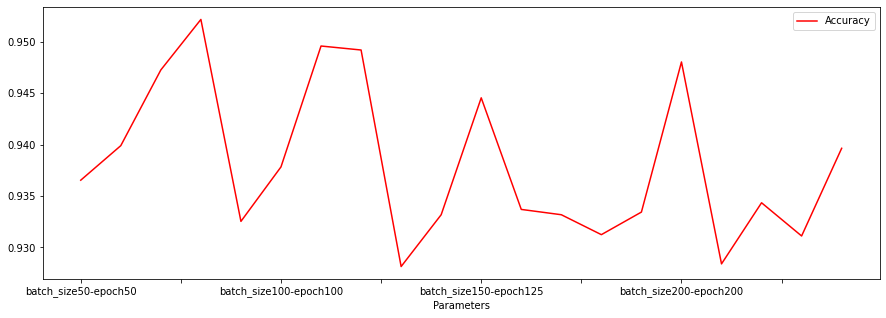

In [ ]:
print(resulting_data.sort_values(by = 'Accuracy', ascending = False).head(1))

%matplotlib inline
resulting_data.plot(x = 'Parameters', y = 'Accuracy', figsize = (15,5),
                    kind = 'line', color = 'red' )

In [ ]:
classifier2.fit(x_train, y_train, batch_size = 50, epochs = 125, verbose = 1)

Epoch 1/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.9269
Epoch 2/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9285
Epoch 3/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1848 - accuracy: 0.9274
Epoch 4/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9265
Epoch 5/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9261
Epoch 6/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.9284
Epoch 7/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1825 - accuracy: 0.9270
Epoch 8/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1819 - accuracy: 0.9263
Epoch 9/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.9283
Epoch 10/125
155/155 [==============================] - 0s 3ms/step - loss: 0.1820 - accura

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[1391   86]
 [  62 1778]]


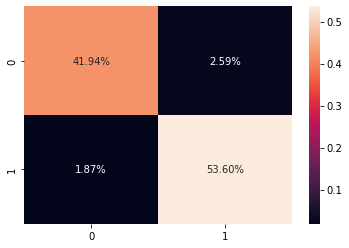

In [ ]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), fmt = '.2%', annot = True)

In [ ]:
precision = confusion_matrix[0,0]/(confusion_matrix[0,0] + confusion_matrix[1,0])
recall = confusion_matrix[0,0]/(confusion_matrix[0,0] + confusion_matrix[0,1])
misrate = confusion_matrix[1,0] / (confusion_matrix[1,0] + confusion_matrix[0,0])

print("Precision = ", round(precision,2))
print("Recall = ", round(recall,2))
print("Miss Rate = ", round(misrate,2))

Precision =  0.96
Recall =  0.94
Miss Rate =  0.04


In [ ]:
f1_score = (2*precision * recall) / (precision + recall)
print("F1 Score = ", round(f1_score,2))

F1 Score =  0.95


## K FOLDS
To get to know the overall Performance metrics of the model, a cross validation procedure is made on the model. KFolds cross validation is being carried out with 20 folds, further, the average of the training and testing accuracy along with  the recall is obtained. The standard Deviation of the Accuracy and recall is also obtained.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

skf = StratifiedKFold(n_splits=20)
skf.get_n_splits(x, y)

test_accuracy = []
train_accuracy = []
miss_rate_all = []

for train_index, test_index in skf.split(x, y):
    print('fold ->', len(train_index))

    train_data, test_data = x[train_index], x[test_index]
    train_labels, test_labels = y[train_index], y[test_index]

    classifier = MLPClassifier(max_iter=500, batch_size = 100, hidden_layer_sizes=(12,8))
    classifier.fit(x_train, y_train)

    predictions_train = classifier.predict(train_data)
    predictions_test = classifier.predict(test_data)
    train_score = accuracy_score(predictions_train, train_labels)
    test_score = accuracy_score(predictions_test, test_labels)
    confusion_mat = confusion_matrix(predictions_test, test_labels)
    miss_rate = confusion_mat[0][1] / (confusion_mat[0][0] + confusion_mat[1][0])
    miss_rate_all.append(miss_rate)

    print ('train accuracy = ', train_score)
    print ('test accuracy = ', test_score)
    print ('miss_rate = ', miss_rate)
    print ('iterations used for inbuilt = ', classifier.n_iter_)

    test_accuracy.append(train_score)
    train_accuracy.append(test_score)

    print ()


fold -> 10502
train accuracy =  0.9503904018282232
test accuracy =  0.976491862567812
miss_rate =  0.0163265306122449
iterations used for inbuilt =  267

fold -> 10502
train accuracy =  0.9526756808227005
test accuracy =  0.9638336347197106
miss_rate =  0.05714285714285714
iterations used for inbuilt =  238

fold -> 10502
train accuracy =  0.9422967053894497
test accuracy =  0.9674502712477396
miss_rate =  0.036734693877551024
iterations used for inbuilt =  212

fold -> 10502
train accuracy =  0.9404875261854885
test accuracy =  0.9602169981916817
miss_rate =  0.05714285714285714
iterations used for inbuilt =  153

fold -> 10502
train accuracy =  0.9529613406970101
test accuracy =  0.9674502712477396
miss_rate =  0.036734693877551024
iterations used for inbuilt =  241

fold -> 10502
train accuracy =  0.9393448866882499
test accuracy =  0.9620253164556962
miss_rate =  0.036734693877551024
iterations used for inbuilt =  193

fold -> 10502
train accuracy =  0.9384879070653209
test accurac

In [ ]:
miss_acc_mean = np.array(miss_rate_all).mean()

miss_acc_std = np.std(np.array(miss_rate_all))
print (miss_acc_mean,miss_acc_std)

0.054733188357310135 0.03676654344013291


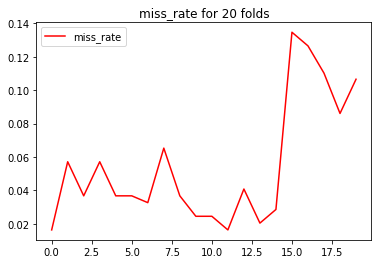

In [ ]:
plt.title('miss_rate for 20 folds')
plt.plot(miss_rate_all, label="miss_rate", color = 'red')

plt.legend()

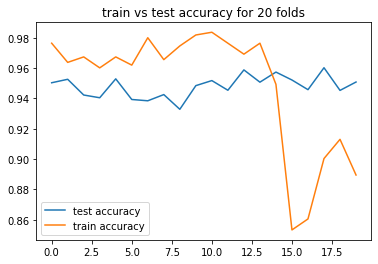

In [ ]:
plt.title('train vs test accuracy for 20 folds')
plt.plot(test_accuracy, label="test accuracy")
plt.plot(train_accuracy, label = 'train accuracy')

plt.legend()

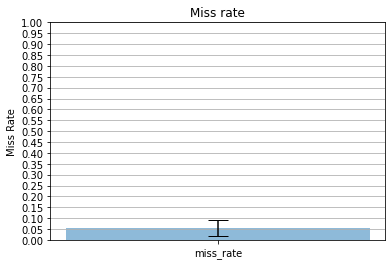

In [ ]:
inputs = ['miss_rate']

miss_rate_mean = np.array(miss_rate_all).mean()

miss_rate_std = np.std(np.array(miss_rate_all))

means = [miss_rate_mean]
stds = [miss_rate_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(inputs)), means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.9)
ax.set_ylabel('Miss Rate')
ax.set_xticks(np.arange(len(inputs)))
ax.set_xticklabels(inputs)
ax.set_yticks([i/20 for i in range(21)])
ax.set_title('Miss rate')
ax.yaxis.grid(True)

plt.show()

Mean Train Accuracy =  0.9485910186859554
Mean Test Accuracy = 0.9479729834968571
Mean Train Standard Deviation =  0.04016291519147206
Mean Test Standard Deviation =  0.007035100606062305


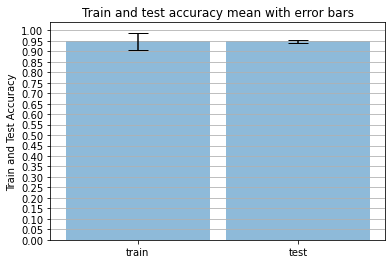

In [ ]:
inputs = ['train', 'test']

train_acc_mean = np.array(train_accuracy).mean()
test_acc_mean = np.array(test_accuracy).mean()

train_acc_std = np.std(np.array(train_accuracy))
test_acc_std = np.std(np.array(test_accuracy))

print("Mean Train Accuracy = ", train_acc_mean)
print("Mean Test Accuracy =", test_acc_mean)
print("Mean Train Standard Deviation = ", train_acc_std)
print("Mean Test Standard Deviation = ", test_acc_std)

means = [train_acc_mean, test_acc_mean]
stds = [train_acc_std, test_acc_std]

# Build the plot
fig, ax = plt.subplots()
ax.bar(np.arange(len(inputs)), means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.9)
ax.set_ylabel('Train and Test Accuracy')
ax.set_xticks(np.arange(len(inputs)))
ax.set_xticklabels(inputs)
ax.set_yticks([i/20 for i in range(21)])
ax.set_title('Train and test accuracy mean with error bars')
ax.yaxis.grid(True)

plt.show()

# $$DETECTION-OF-PHISHING-WEBSITES$$
## Algorithm Implemented - MULTILAYER PERCEPTRON
### SELF Implementation

### IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix

In [ ]:
# sf = 0.7
# n_train = math.floor(sf * x.shape[0])
# n_test = math.ceil((1-sf) * x.shape[0])
# x_train2 = x[:n_train]
# y_train = y[:n_train]
# x_test2 = x[n_train:]
# y_test = y[n_train:]

# # reshaping the x_train and x_test
# x_train2 = x_train2.T
# x_test2 = x_test2.T

# print("x_train2.shape = ",x_train2.shape)
# print("y_train.shape = ",y_train.shape)
# print("x_test2.shape = ",x_test2.shape)
# print("y_test.shape = ",y_test.shape)

### Network Architecture
We are using a 3 layer neural network for our approach.

The input layer has 30 nodes, followed by 2 hidden layers having 12 and 8 nodes respectively.

Each node will have *relu* activation function.

The feed forward operation equations are as follows:

$$z^1 = w^1x + b^1$$
$$y^1 = φ(z^1)$$
$$z^2 = w^2y^1 + b^2$$
$$y^2 = φ(z^2)$$
$$z^3 = w^3y^2 + b^3$$
$$y = φ(z^3)$$

### Network Initialization

In [ ]:
def threeLayerNetwork(layer_dimensions = [30,12,8,1]):
  np.random.seed(3)

  mean = 0
  stdev = 0.01

  parameters = {}

  parameters['w1'] = np.random.normal(mean, stdev, size = (layer_dimensions[1], layer_dimensions[0]))
  # print("parameters['w1'].shape = ", parameters["w1"].shape)

  parameters['b1'] = np.zeros(layer_dimensions[1])
  # parameters['b1'] = parameters['b1'].reshape(parameters['b1'].shape[0],1)
  # print("parameters['b1'].shape = ", parameters["b1"].shape)

  parameters['w2'] = np.random.normal(mean, stdev, size = (layer_dimensions[2], layer_dimensions[1]))
  # print("parameters['w2'].shape = ", parameters["w2"].shape)

  parameters['b2'] = np.zeros(layer_dimensions[2])
  # parameters['b2'] = parameters['b2'].reshape(parameters['b2'].shape[0],1)
  # print("parameters['b2'].shape = ", parameters["b2"].shape)

  parameters['w3'] = np.random.normal(mean, stdev, size = (layer_dimensions[3], layer_dimensions[2]))
  # print("parameters['w3'].shape = ", parameters["w3"].shape)

  parameters['b3'] = np.zeros(layer_dimensions[3])
  # parameters['b3'] = parameters['b3'].reshape(parameters['b3'].shape[0],1)
  # print("parameters['b3'].shape = ", parameters["b3"].shape)

  return parameters

In [ ]:
# Function to compute Max
def my_max(a):
  if a.all() > 0:
    return a
  else:
    return 0

# Function to compute Relu
def relu(z):
  output = []
  for i in range(len(z)):
    relu_result = my_max(z[i])
    output.append(relu_result)
  return np.array(output)

# Function to compute Sigmoid
def sigmoid(Z):
    Y = 1 / (1 + np.exp(-Z))
    return Y

# Deriuvative of relu
def derivativeRelu(z):
  data = [1 if value>0 else 0 for value in x]
  return np.array(data, dtype=float)

### Cross Entropy Loss

The binary cross entropy loss can be computed by the following equation:

$$Loss_i = -y_ilogy_i^{(2)} - (1 - y_i) log (1 - y_i^{(2)})$$

Here $y_i$ is the true label and $y_i^{(2)}$ is the predicted label.

We can average out the loss value for $N$ number of samples as $Loss = \frac{1}{N}∑_{i=1}^NLoss_i$.

In [ ]:
def totalloss(y_true, Y):

  l = 0

  for true_y, pred_y in zip(y_true, Y.T):
    computed_loss = -true_y*np.log(pred_y) - (1-true_y)*np.log(1 - pred_y)
    l += computed_loss

  l = l / len(Y)
  # print("loss =", l)
  # print("loss.shape = ", loss.shape)
  return l

### Forward Propagation
The code for the forward pass operation of a 3 layer network.

The function also returns the intermediate layer parameters, which are as follows: [ $z^1, x, z^2, y^1, z^3, y^2, y$ ]

The function also returns $y$, the final output of the network

In [ ]:
def forward(x, parameters):

  hidden_parameters = {}

  hidden_parameters['x'] = x
  # print("hidden_parameters['x'].shape = ", hidden_parameters['x'].shape)

  hidden_parameters['z1'] = parameters["w1"].dot(hidden_parameters["x"])
  hidden_parameters['z1'] += parameters['b1'].reshape(parameters['b1'].shape[0],1)
  # print("hidden_parameters['z1'].shape = ", hidden_parameters['z1'].shape)

  hidden_parameters['y1'] = sigmoid(hidden_parameters['z1'])
  # print("hidden_parameters['y1'].shape = ", hidden_parameters['y1'].shape)

  hidden_parameters['z2'] = parameters["w2"].dot(hidden_parameters["y1"]) + parameters['b2'].reshape(parameters['b2'].shape[0],1)
  # print("hidden_parameters['z2'].shape = ", hidden_parameters['z2'].shape)

  hidden_parameters['y2'] = sigmoid(hidden_parameters['z2'])
  # print("hidden_parameters['y2'].shape = ", hidden_parameters['y2'].shape)

  hidden_parameters['z3'] = parameters["w3"].dot(hidden_parameters["y2"]) + parameters['b3'].reshape(parameters['b3'].shape[0],1)
  # print("hidden_parameters['z3'].shape = ", hidden_parameters['z3'].shape)

  Y = sigmoid(hidden_parameters['z3'])
  # print("Y.shape = ", Y.shape)

  return Y, hidden_parameters

In [ ]:
def backward(y_true, Y, hidden_parameters, parameters):
  grads = {}

  y_true = y_true.reshape(1,y_true.shape[0])

  del_3 = Y - y_true
  grads['grad_w3'] = del_3.dot(hidden_parameters['y2'].T)
  grads['grad_b3'] = np.sum(del_3,axis=1)

  del_2 = parameters['w3'].T.dot(del_3) * (sigmoid(hidden_parameters['z2'])*(1 - sigmoid(hidden_parameters['z2'])))
  # del_2 = parameters['w3'].T.dot(del_3) * derivativeRelu(hidden_parameters['z2'])
  grads['grad_w2'] = del_3.dot(hidden_parameters['y1'].T)
  grads['grad_b2'] = np.sum(del_2,axis=1)

  del_1 = parameters['w2'].T.dot(del_2) * (sigmoid(hidden_parameters['z1'])*(1 - sigmoid(hidden_parameters['z1'])))
  # del_1 = parameters['w2'].T.dot(del_2) * derivativeRelu(hidden_parameters['z1'])
  grads['grad_w1'] = del_1.dot(hidden_parameters['x'].T)
  grads['grad_b1'] = np.sum(del_1,axis=1)

  return grads

### OPTIMIZER
Using standard gradient descent based optimizer to minimize th loss function.

We will be using the same learnin rate for all the weights in this problem.

$w1, b1, w2, b2, w3, and, b3$ will be computed as:

$$w1 ← w1 - α∇_{w1}Loss$$
$$b1 ← b1 - α∇_{b1}Loss$$
$$w2 ← w2 - α∇_{w2}Loss$$
$$b2 ← b2 - α∇_{b2}Loss$$
$$w3 ← w3 - α∇_{w3}Loss$$
$$b3 ← b3 - α∇_{b3}Loss$$

In [ ]:
def gradientDescent(parameters, grads, learning_rate):

  parameters['w1'] = parameters['w1'] - learning_rate * grads['grad_w1']
  parameters['b1'] = parameters['b1'] - learning_rate * grads['grad_b1']
  parameters['w2'] = parameters['w2'] - learning_rate * grads['grad_w2']
  parameters['b2'] = parameters['b2'] - learning_rate * grads['grad_b2']
  parameters['w3'] = parameters['w3'] - learning_rate * grads['grad_w3']
  parameters['b3'] = parameters['b3'] - learning_rate * grads['grad_b3']

  return parameters

### Training the model

In [ ]:
# layer_dimensions = [30, 12, 8, 1]
layer_dimensions = [x_train2.shape[0], 12, 8, 1]
epochs = 500
learning_rate = 0.001

parameters = threeLayerNetwork(layer_dimensions)

In [ ]:
def predict(x, params):
  Y2, _ = forward(x, params)
  Y2 = np.array([1 if y_i > 0.5 else 0 for y_i in Y2.T]).reshape(1,-1)
  return Y2

def accuracy(y, y_pred):
  a = y_pred.reshape(-1)
  b = np.array([y == a])
  acc = np.sum(b) / b.shape[1]
  return acc

In [ ]:
loss_history = []
train_acc = []
test_acc = []
miss_rate_all = []

for i in range(epochs):
  print("Details corresponding to epoch no. ->", i+1)
  Y, hidden_parameters = forward(x_train2, parameters)

  loss = totalloss(y_train, Y)
  loss_history.append(loss)
  print("loss = ", loss)

  train_pred2 = predict(x_train2, parameters)
  train_accuracy = accuracy(y_train, train_pred2)
  train_acc.append(train_accuracy)

  test_pred = predict(x_test2, parameters)
  test_accuracy = accuracy(y_test, test_pred)
  test_acc.append(test_accuracy)


  gradients = backward(y_train, Y, hidden_parameters, parameters)
  parameters = gradientDescent(parameters, gradients, learning_rate)

  print("**********")
  print()

Details corresponding to epoch no. -> 1
loss =  [5369.53095885]
**********

Details corresponding to epoch no. -> 2
loss =  [7635.62232682]
**********

Details corresponding to epoch no. -> 3
loss =  [9883.2574287]
**********

Details corresponding to epoch no. -> 4
loss =  [50047.01344454]
**********

Details corresponding to epoch no. -> 5
loss =  [88129.61635809]
**********

Details corresponding to epoch no. -> 6
loss =  [22573.1644863]
**********

Details corresponding to epoch no. -> 7
loss =  [113662.70228376]
**********

Details corresponding to epoch no. -> 8
loss =  [8367.9723474]
**********

Details corresponding to epoch no. -> 9
loss =  [93063.21202159]
**********

Details corresponding to epoch no. -> 10
loss =  [46335.4886011]
**********

Details corresponding to epoch no. -> 11
loss =  [7716.05746803]
**********

Details corresponding to epoch no. -> 12
loss =  [8447.79614025]
**********

Details corresponding to epoch no. -> 13
loss =  [8631.85274834]
**********

Detai

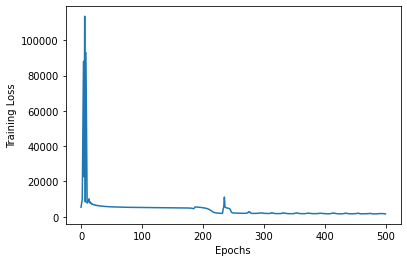

In [ ]:
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()

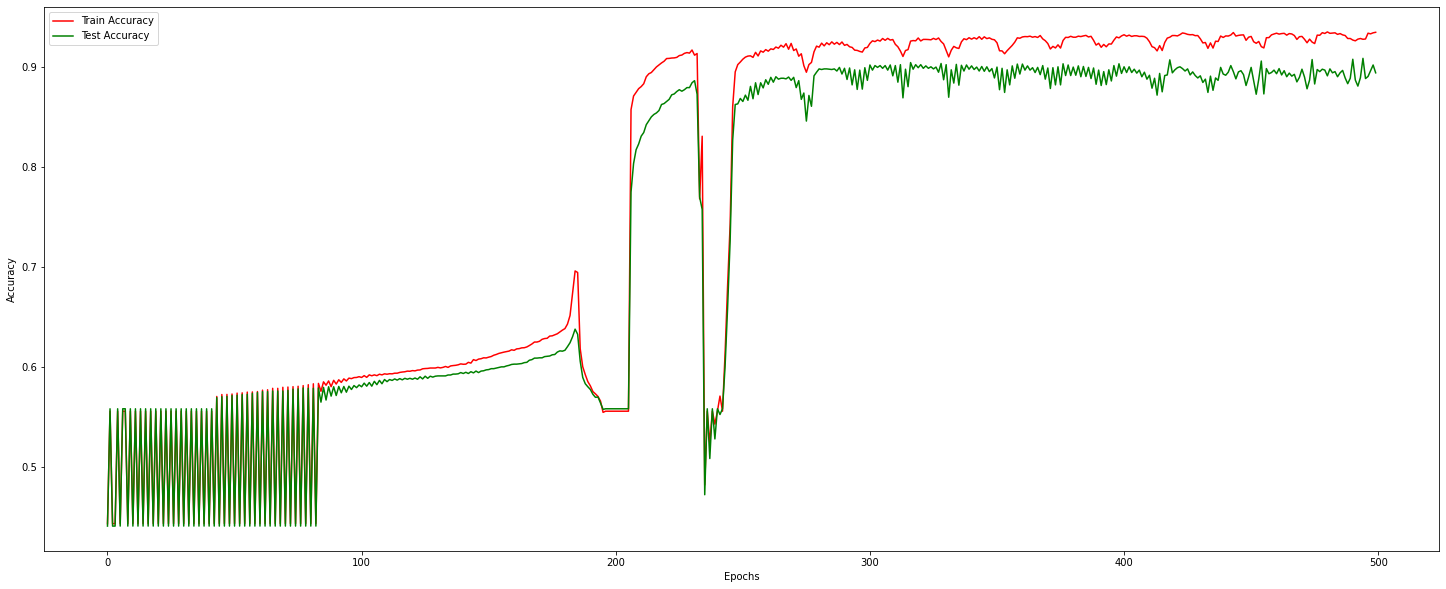

In [ ]:
plt.figure(figsize = (25,10))
# plt.plot(np.log(loss_history), color = 'red')
plt.plot(train_acc, color = 'red')
plt.plot(test_acc, color = 'green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()

In [ ]:
y_pred = predict(x_train2, parameters)
acc = accuracy(y_train, y_pred)
print("Training accuracy:", acc*100, "%")

y_pred2 = predict(x_test2, parameters)
acc = accuracy(y_test, y_pred2)
print("Test accuracy:", acc*100, "%")

Training accuracy: 93.5642284828121 %
Test accuracy: 89.0563762435936 %


## CONFUSION MATRIX AND RECALL

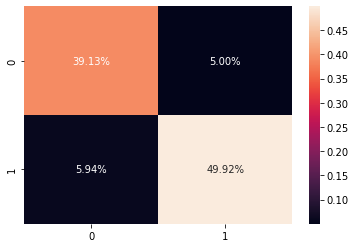

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred2 = y_pred2.reshape((len(y_test),))

confusion_mat = confusion_matrix(y_test, y_pred2)

sns.heatmap(confusion_mat/np.sum(confusion_mat), fmt = '.2%', annot = True)

In [ ]:
target_names = ['0','1']
print(classification_report(y_test, y_pred2, target_names = target_names))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1464
           1       0.91      0.89      0.90      1853

    accuracy                           0.89      3317
   macro avg       0.89      0.89      0.89      3317
weighted avg       0.89      0.89      0.89      3317



In [ ]:
precision = confusion_mat[0,0]/(confusion_mat[0,0] + confusion_mat[1,0])
recall = confusion_mat[0,0]/(confusion_mat[0,0] + confusion_mat[0,1])
misrate = confusion_mat[1,0] / (confusion_mat[1,0] + confusion_mat[0,0])

print("Precision = ", round(precision,2))
print("Recall = ", round(recall,2))
print("Miss Rate = ", round(misrate,2))

Precision =  0.87
Recall =  0.89
Miss Rate =  0.13


In [ ]:
f1_score = (2*precision * recall) / (precision + recall)
print("F1 Score = ", round(f1_score,2))

F1 Score =  0.88


## K FOLDS

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix

# skf = StratifiedKFold(n_splits=5)
# skf.get_n_splits(x, y)

# test_accuracy = []
# train_accuracy = []
# miss_rate_all = []

# for train_index, test_index in skf.split(x, y):
#     print('fold ->', len(train_index))

#     train_data, test_data = x[train_index], x[test_index]
#     train_data = train_data.T
#     test_data = test_data.T

#     train_labels, test_labels = y[train_index], y[test_index]

#     predictions_test = []
#     loss_history = []
#     train_acc = []
#     test_acc = []

#     for i in range(epochs):
#       print("Details corresponding to epoch no. ->", i+1)
#       Y, hidden_parameters = forward(train_data, parameters)

#       loss = totalloss(train_labels, Y)
#       loss_history.append(loss)
#       print("loss = ", loss)

#       train_pred = predict(train_data, parameters)
#       train_accuracy = accuracy(train_labels, train_pred)
#       train_acc.append(train_accuracy)

#       test_pred = predict(test_data, parameters)
#       test_accuracy = accuracy(test_labels, test_pred)
#       test_acc.append(test_accuracy)

#       predictions_test.append(test_pred)

#       gradients = backward(train_labels, Y, hidden_parameters, parameters)
#       parameters = gradientDescent(parameters, gradients, learning_rate)

#       train_pred = train_pred.reshape((len(test_labels),))

#       print('test_pred.shape = ',test_pred.shape)
#       print('test_labels.shape = ',test_labels.shape)

#       confusion_mat = confusion_matrix(test_labels, test_pred)
#       miss_rate = confusion_mat[0][1] / (confusion_mat[0][0] + confusion_mat[1][0])
#       miss_rate_all.append(miss_rate)

#       print("**********")
#       print()

#     # confusion_mat = confusion_matrix(test_labels, test_pred)
#     # miss_rate = confusion_mat[0][1] / (confusion_mat[0][0] + confusion_mat[1][0])
#     # miss_rate_all.append(miss_rate)

In [ ]:
# miss_acc_mean = np.array(miss_rate_all).mean()

# miss_acc_std = np.std(np.array(miss_rate_all))
# print (miss_acc_mean,miss_acc_std)

In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency 

In [ ]:
!jupyter nbconvert --log-level CRITICAL --to pdf ngaut006MultiLayer_Perceptron.ipynb